In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('G:\Machine learning Course - Udemy\campusX\placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


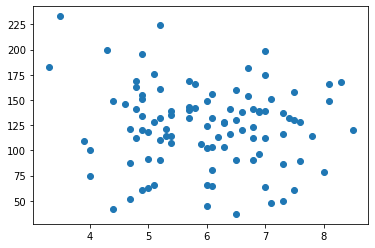

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

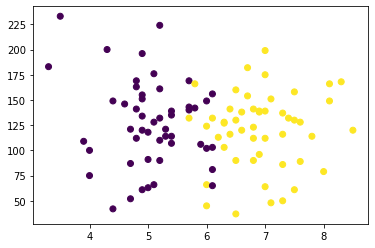

In [8]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

## EDA

In [10]:
X = df.iloc[:,0:2]

In [11]:
X

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [12]:
y = df.iloc[:,-1]

In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# for train and test split

In [14]:
from sklearn.model_selection import train_test_split
train_test_split(X, y, test_size=0.1)

[    cgpa   iq
 60   6.9  139
 72   7.3  116
 63   6.3  128
 86   5.1  128
 18   4.0  100
 ..   ...  ...
 43   6.8  141
 12   5.4  139
 34   4.8  163
 52   7.0  175
 5    7.1   48
 
 [90 rows x 2 columns],
     cgpa   iq
 13   6.4  116
 47   5.2  161
 98   6.3  103
 30   7.6  128
 65   8.1  166
 22   4.9  120
 3    7.4  132
 4    5.8  142
 48   6.6  138
 44   7.5   61,
 60    1
 72    1
 63    1
 86    0
 18    0
      ..
 43    1
 12    0
 34    0
 52    1
 5     1
 Name: placement, Length: 90, dtype: int64,
 13    1
 47    0
 98    1
 30    1
 65    1
 22    0
 3     1
 4     0
 48    1
 44    1
 Name: placement, dtype: int64]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [16]:
X_test

,cgpa,iq
99,6.2,113
17,3.3,183
25,5.0,91
61,7.3,137
64,7.0,64
58,8.0,79
51,4.8,141
21,7.1,151
8,6.1,156
91,7.5,158


In [17]:
X_train

,cgpa,iq
65,8.1,166
14,6.1,103
88,4.4,149
60,6.9,139
70,6.3,127
...,...,...
42,7.6,89
77,7.3,50
46,5.3,114
98,6.3,103


In [18]:
y_train

65    1
14    0
88    0
60    1
70    1
     ..
42    1
77    1
46    0
98    1
73    0
Name: placement, Length: 90, dtype: int64

In [19]:
y_test

99    1
17    0
25    0
61    1
64    1
58    1
51    0
21    1
8     0
91    1
Name: placement, dtype: int64

## for scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

In [23]:
X_train

array([[ 1.93656349,  1.06997732],
       [ 0.12292443, -0.50376364],
       [-1.41866878,  0.64531706],
       [ 0.84838005,  0.39551691],
       [ 0.30428833,  0.09575673],
       [ 1.48315373,  0.12073674],
       [-1.41866878, -2.02754458],
       [ 0.12292443,  0.2206568 ],
       [ 0.93906201,  0.39551691],
       [ 0.48565224,  0.92009723],
       [-0.69321316, -0.32890353],
       [ 0.7576981 , -0.2789435 ],
       [ 0.93906201,  1.29479746],
       [ 0.12292443, -1.45300422],
       [ 1.93656349,  0.64531706],
       [ 0.03224247,  0.02081668],
       [ 0.7576981 , -0.00416334],
       [ 1.66451763, -0.22898347],
       [-0.96525902,  1.81937778],
       [-0.51184925,  0.29559685],
       [ 0.57633419,  0.37053689],
       [ 0.03224247, -0.52874366],
       [ 1.39247177,  0.17069677],
       [-0.51184925,  0.39551691],
       [-1.14662292, -1.77774442],
       [ 0.39497029,  0.44547694],
       [-1.7813966 , -0.57870369],
       [-0.69321316,  0.2206568 ],
       [-0.78389511,

In [26]:
X_test = scalar.fit_transform(X_test)

In [27]:
X_test

array([[-0.02153819, -0.38813295],
       [-2.10356319,  1.51181856],
       [-0.88306578, -0.98526057],
       [ 0.76819543,  0.263279  ],
       [ 0.55281353, -1.71809901],
       [ 1.27075319, -1.31096654],
       [-1.02665371,  0.37184765],
       [ 0.6246075 ,  0.6432693 ],
       [-0.09333216,  0.77898012],
       [ 0.91178336,  0.83326445]])

## Train the model

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [30]:
clf.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [31]:
y_test

99    1
17    0
25    0
61    1
64    1
58    1
51    0
21    1
8     0
91    1
Name: placement, dtype: int64

In [32]:
y_pred = clf.predict(X_test)

# calculate acuracy score

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

In [37]:
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [38]:
clf.predict(70, 5)

TypeError: predict() takes 2 positional arguments but 3 were given